In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [14, 6]
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
data_path = '/home/thangnd/git/ecg_201809/data/data-20180905T135849Z-001/data'

training = np.load(data_path + '/training_data.npy')
testing  = np.load(data_path + '/test_data.npy')
print(training.shape)
print(testing.shape)

print(training[:, -1])

(2161, 9)
(435, 9)
[0. 0. 0. ... 1. 0. 1.]


In [4]:
index_AF = np.where(training[:, -1] == 1)[0]
index_Normal = np.where(training[:, -1] == 0)[0]
AF = training[index_AF]
Normal = training[index_Normal]

<IPython.core.display.Javascript object>


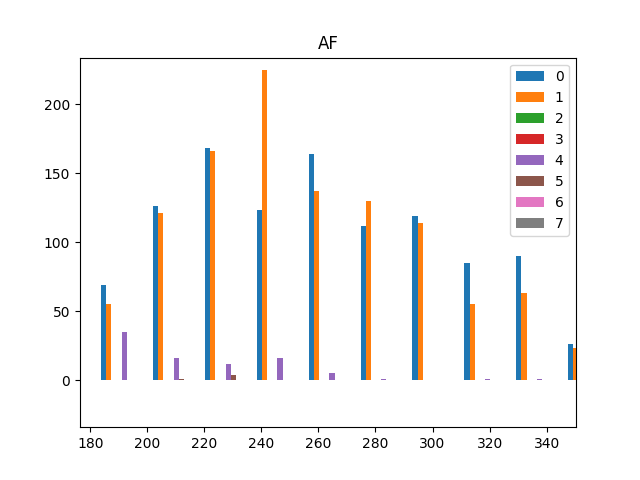

<IPython.core.display.Javascript object>


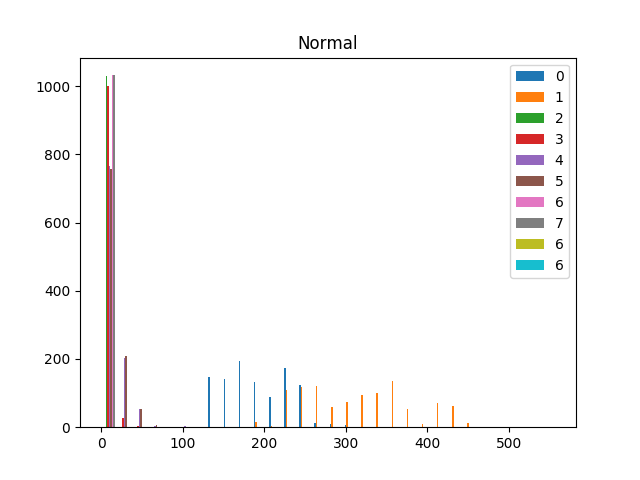

In [5]:
label = [str(i) for i in range(8)]
# xx = [0, 1, 3, 4, 5]
xx = list(range(8))
#
plt.hist(AF[:, xx], 30, label=[label[i] for i in xx])
plt.legend(loc='upper right')
plt.title('AF')
plt.figure()
plt.hist(Normal[:, xx], 30, label=[label[i] for i in xx])
plt.legend(loc='upper right')
plt.title('Normal')
plt.show()

<IPython.core.display.Javascript object>


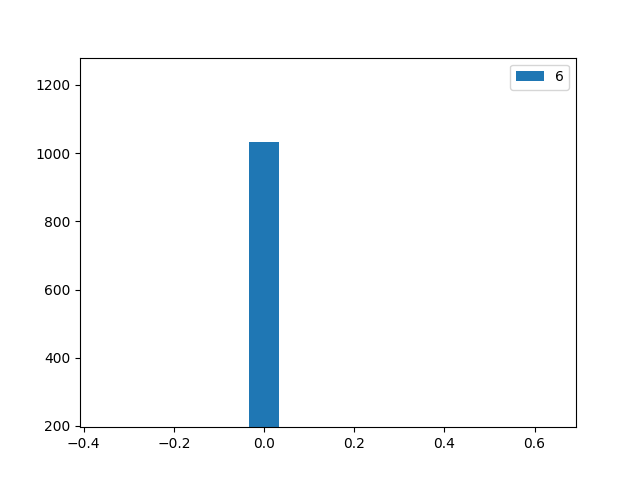

In [7]:
xx = [6, ]
#
plt.hist(AF[:, xx], 15, label=[label[i] for i in xx])
plt.legend(loc='upper right')
plt.figure()
plt.hist(Normal[:, xx], 15, label=[label[i] for i in xx])
plt.legend(loc='upper right')
plt.show()

In [5]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(X=training[:, :-1], y=training[:, -1])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [13]:
prediction = model.predict(training[:, :-1])
acc = accuracy_score(prediction, training[:, -1])
print(acc)

0.996760758907913
